    Analisís exploratorio

Importando librerias 

In [3]:
import numpy as np  # Para operaciones matemáticas y arreglos numéricos
import pandas as pd  # Para manejar y analizar datos en formato tabular
import matplotlib.pyplot as plt  # Para crear gráficos y visualizaciones estáticas
import seaborn as sns  # Para crear gráficos estadísticos con estilo mejorado y más atractivo

Carga de datos y visualización de tablas

In [8]:
data_p_compra = pd.read_csv('C:/Users/sagua/OneDrive/Escritorio/DATA HENRY/Proyecto Final/2017PurchasePricesDec.csv') 
data_p_compra.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


Utilizando el atributo .shape() se describen las caracteristicas de nuestro dataset para verificar la cantidad de registros 

In [ ]:
print(f"Total Registros: {data_p_compra.shape[0]}, Total Columnas: {data_p_compra.shape[1]}")

Total Registros: 12261, Total Columnas: 9


Procedemos a imprimir los nombres de las columnas y sus respectivos tipos de datos en el DataFrame. Esto nos permite conocer si las variables son numéricas, de texto, fechas, etc.
Lo cual es útil para decidir cómo limpiarlas, analizarlas o visualizarlas más adelante.

In [7]:
print("\nColumnas y tipos de datos:")
for col, dtype in data_p_compra.dtypes.items():
    print(f"{col}: {dtype}")


Columnas y tipos de datos:
Brand: int64
Description: object
Price: float64
Size: object
Volume: object
Classification: int64
PurchasePrice: float64
VendorNumber: int64
VendorName: object


In [9]:
data_p_compra.describe()

,Brand,Price,Classification,PurchasePrice,VendorNumber
count,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,17989.067123,38.640240,1.708996,26.488220,10814.861757
std,12528.503464,206.151172,0.454244,156.182948,19007.682322
min,58.000000,0.000000,1.000000,0.000000,2.000000
25%,5990.000000,10.990000,1.000000,6.890000,3960.000000
50%,18788.000000,15.990000,2.000000,10.650000,7153.000000
75%,25117.000000,29.990000,2.000000,20.130000,9552.000000
max,90631.000000,13999.900000,2.000000,11111.030000,173357.000000


In [11]:
print(data_p_compra.isnull().sum())

Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64


In [10]:
print((data_p_compra.isnull().sum() / len(data_p_compra) * 100).round(2))

Brand             0.00
Description       0.01
Price             0.00
Size              0.01
Volume            0.01
Classification    0.00
PurchasePrice     0.00
VendorNumber      0.00
VendorName        0.00
dtype: float64


Considerando que las columnas con valores nulos representan menos del 0.01% se decide eliminar esos registros 

In [13]:
# Elimina las filas que tienen valores faltantes en las columnas 'Description', 'Size' y 'Volume',
# ya que se considera que esos valores no son relevantes para el análisis.
data_p_compra = data_p_compra.dropna(subset=['Description', 'Size', 'Volume'])

print(data_p_compra[['Description', 'Size', 'Volume']].isnull().sum())

Description    0
Size           0
Volume         0
dtype: int64


Revisión de registros duplicados

In [ ]:
# Detectar duplicados en todas las columnas
duplicados_todos = data_p_compra.duplicated()

# Mostrar cuántos registros están duplicados, esto no cuenta la primera aparición de cada registro
print(f"Duplicados exactos: {duplicados_todos.sum()}")

# Mostrar las filas duplicadas exactas
print(data_p_compra[duplicados_todos])

Duplicados exactos: 0
Empty DataFrame
Columns: [Brand, Description, Price, Size, Volume, Classification, PurchasePrice, VendorNumber, VendorName]
Index: []


Revision de registros duplicados por Marca, descripción y precio

In [19]:
# Detectar duplicados basados en columnas clave
cols_clave = ['Brand', 'Description', 'Price']
duplicados_especificos = data_p_compra.duplicated(subset=cols_clave)

print(f"Duplicados por Marca, Descripción y Precio: {duplicados_especificos.sum()}")

# Ver las filas duplicadas según este criterio
print(data_p_compra[duplicados_especificos])

Duplicados por Marca, Descripción y Precio: 0
Empty DataFrame
Columns: [Brand, Description, Price, Size, Volume, Classification, PurchasePrice, VendorNumber, VendorName]
Index: []


In [50]:
print(data_p_compra['Size'].unique())

['750mL' '1000mL' '1750mL' '50mL' '375mL' '100mL 4 Pk' '50mL 5 Pk' '100mL'
 '200mL' '50mL 4 Pk' '50mL 3 Pk' '300mL' '200mL 4 Pk' '750mL 2 Pk'
 '250mL 4 Pk' '1500mL' '3000mL' '5000mL' '4000mL' '187mL 4 Pk' '150mL'
 '187mL' '500mL' '720mL' '650mL' '200mL 3 Pk' '187mL 3 Pk' '330mL' '250mL'
 '750mL + 3/' '18000mL' '180mL' '750mL + 4/' '6000mL' '1000mL 2 Pk'
 '750mL 12 P' '750mL 6 Pk' '20mL 5 Pk' '375mL 2 Pk' '20000mL' '50mL 12 Pk'
 '750mL 3 Pk' '375mL 3 Pk' '750mL + 1/' '200mL 5 Pk' '162.5mL' '400mL'
 '1100ml' '600mL' '19500mL' '560mL' '3750mL' '750mL  3' '1500ml' '9000mL']


In [24]:
print(data_p_compra['Volume'].unique())

['750' '1000' '1750' '50' '375' '100' '200' '300' 'Unknown' '250' '1500'
 '3000' '5000' '4000' '187' '150' '500' '720' '650' '330' '18000' '180'
 '6000' '20' '20000' '162.5' '400' '1100' '600' '19500' '560' '3750'
 '9000']


In [ ]:
# Convertir 'Volume' a valores numéricos (en mililitros), asignando NaN a 'Unknown'
data_p_compra['Volume_ml'] = pd.to_numeric(data_p_compra['Volume'], errors='coerce')


In [34]:
print(data_p_compra['Volume_ml'].isnull().sum())  # Cuántos NaN hay

4


Se decide eliminar 4 registros con valores faltantes de un total de 12,260 ya que representa solo un 0.03% del total del dataset, lo cual es estadísticamente insignificante y no tendrá un impacto relevante en el análisis general.

In [52]:
# Eliminar filas donde Volume_ml es NaN
data_p_compra = data_p_compra.dropna(subset=['Volume_ml'])

#Convertir la columna Volume_ml a entero
data_p_compra['Volume_ml'] = data_p_compra['Volume_ml'].astype(int)

#Imprimir el numero de registros para verificar cuantos quedaron 
print(f"Total Registros: {data_p_compra.shape[0]}, Total Columnas: {data_p_compra.shape[1]}")

Total Registros: 12256, Total Columnas: 10


In [43]:
print("\nColumnas y tipos de datos:")
for col, dtype in data_p_compra.dtypes.items():
    print(f"{col}: {dtype}")


Columnas y tipos de datos:
Brand: int64
Description: object
Price: float64
Size: object
Volume: object
Classification: int64
PurchasePrice: float64
VendorNumber: int64
VendorName: object
Volume_ml: int64


In [45]:
print(data_p_compra['Volume_ml'].unique())

[  750  1000  1750    50   375   100   200   300   250  1500  3000  5000
  4000   187   150   500   720   650   330 18000   180  6000    20 20000
   162   400  1100   600 19500   560  3750  9000]


In [46]:
def detectar_outliers_iqr(columna):
    Q1 = data_p_compra[columna].quantile(0.25)
    Q3 = data_p_compra[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = data_p_compra[(data_p_compra[columna] < limite_inferior) | (data_p_compra[columna] > limite_superior)]
    return outliers

In [47]:
columnas_a_revisar = ['Price', 'PurchasePrice', 'Volume_ml']

for col in columnas_a_revisar:
    outliers = detectar_outliers_iqr(col)
    print(f"Outliers en '{col}': {len(outliers)}")

Outliers en 'Price': 1275
Outliers en 'PurchasePrice': 1241
Outliers en 'Volume_ml': 2416


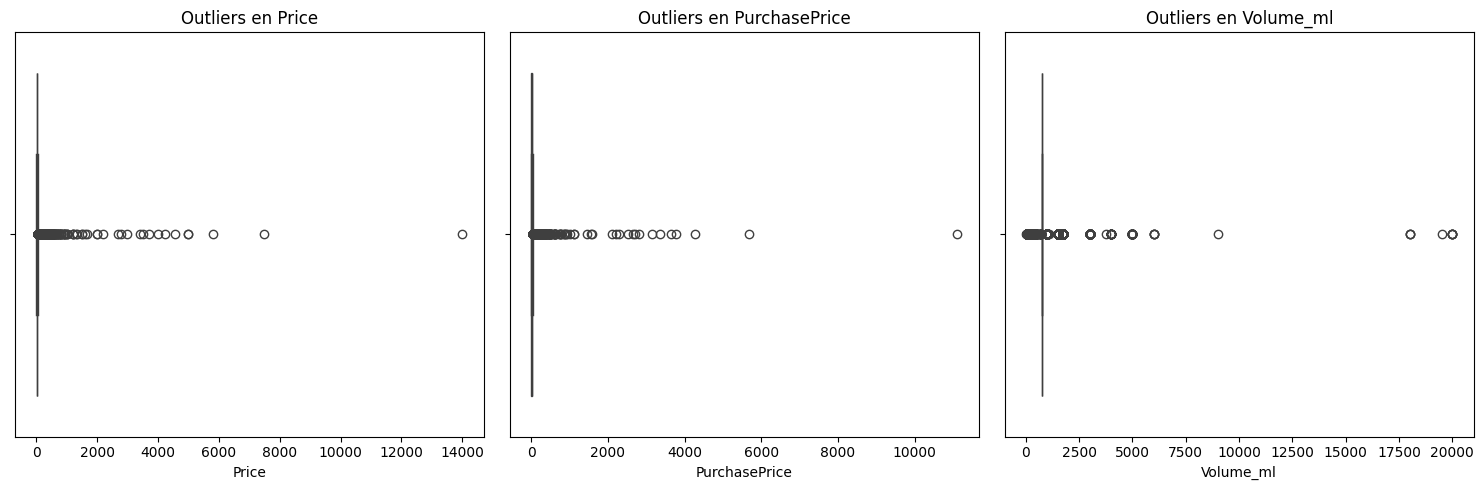

In [49]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=data_p_compra['Price'])
plt.title('Outliers en Price')

plt.subplot(1, 3, 2)
sns.boxplot(x=data_p_compra['PurchasePrice'])
plt.title('Outliers en PurchasePrice')

plt.subplot(1, 3, 3)
sns.boxplot(x=data_p_compra['Volume_ml'])
plt.title('Outliers en Volume_ml')

plt.tight_layout()
plt.show()
